<a href="https://colab.research.google.com/github/NahshonBright/Machine-Learning/blob/main/AudioClassificationANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


In [ ]:
import IPython.display as ipd
import librosa
import librosa.display

In [ ]:
smple_snd = '/content/drive/MyDrive/Datasets/test/fold6/101281-3-0-0.wav'

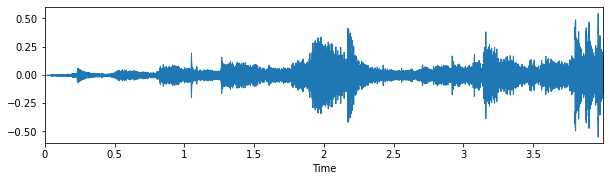

In [ ]:
###Example
plt.figure(figsize=(10,2.5))
data,sample_rate = librosa.load(smple_snd)
librosa.display.waveplot(data, sr=sample_rate) 
ipd.Audio(smple_snd)

In [ ]:
sample_rate

22050

In [ ]:
### normalized sample data
data

array([0.        , 0.        , 0.        , ..., 0.00664298, 0.05353544,
       0.05455069], dtype=float32)

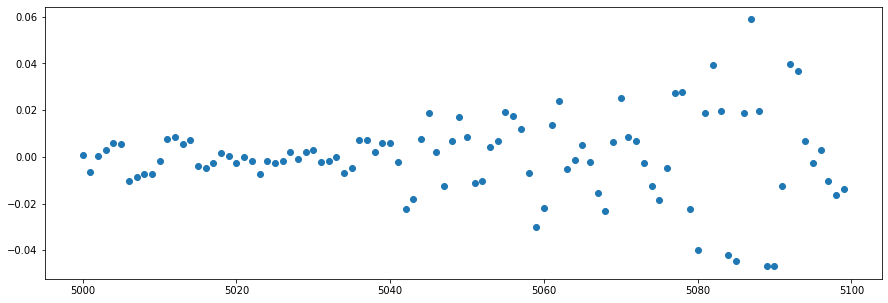

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(range(5000,5100),data[5000:5100])

In [ ]:
data_file = pd.read_csv('/content/drive/MyDrive/Datasets/test/UrbanSound8K.csv')

In [ ]:
data_file.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

In [ ]:
data_file['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

**Data** Preprocessing

In [ ]:
print(data)

[0.         0.         0.         ... 0.00664298 0.05353544 0.05455069]


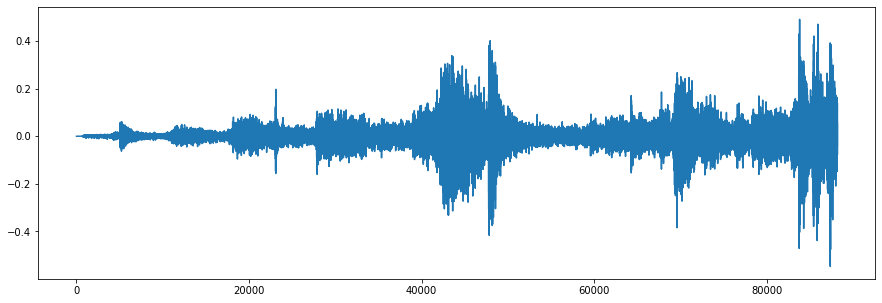

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(data)

In [ ]:
from scipy.io import wavfile as wav
wave_smple_rt, wav_ado = wav.read(smple_snd)
wav_ado

array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [ -267,  3908],
       [ -349,  4419],
       [-1022,  3671]], dtype=int16)

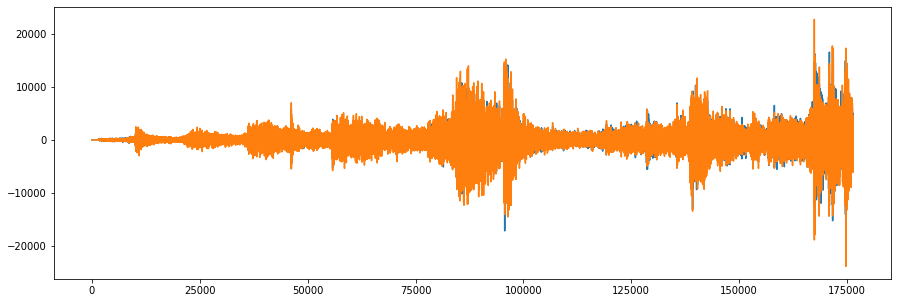

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(wav_ado)

In [ ]:
wav_ado[:,1]

array([   0,    0,    0, ..., 3908, 4419, 3671], dtype=int16)

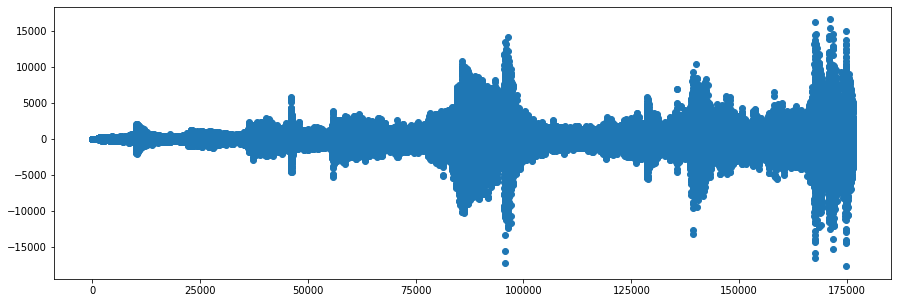

In [ ]:
plt.figure(figsize = (15,5))
plt.scatter(range(len(wav_ado[:,0])),wav_ado[:,0])

Extracting Features with Mel-Frequency technique

In [ ]:
mfccs = librosa.feature.mfcc(y= data, sr=sample_rate, n_mfcc = 40)

In [ ]:
mfccs.shape

(40, 173)

In [ ]:
mfccs

array([[-691.6476   , -524.04974  , -440.73282  , ...,  -51.9833   ,
         -36.83425  ,  -63.378307 ],
       [  14.962671 ,   42.640747 ,   49.542034 , ...,  -24.80716  ,
         -26.671015 ,  -18.19902  ],
       [ -12.813229 ,  -53.654896 ,  -53.21942  , ...,  -63.788277 ,
         -67.779854 ,  -63.450264 ],
       ...,
       [  -5.3380146,    2.919688 ,    4.4485154, ...,   12.795425 ,
          12.297191 ,    6.4769835],
       [  -4.441575 ,    5.638219 ,    6.549737 , ...,    2.4856648,
           2.955298 ,    2.1118917],
       [   1.3507533,    2.1129017,    1.4954026, ...,    7.403717 ,
           4.9810414,    3.6032696]], dtype=float32)

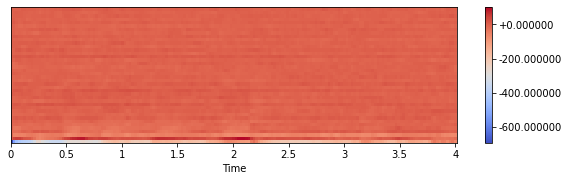

In [ ]:
plt.figure(figsize = (10,2.5))
librosa.display.specshow(mfccs, x_axis = 'time', sr = sample_rate)
plt.colorbar(format = '%+2f')

In [ ]:
import os

In [ ]:
def feature_extrator(file):
  audio, sample_rate = librosa.load(file, res_type = 'kaiser_fast')
  mfccs_features = librosa.feature.mfcc(y=audio, sr= sample_rate, n_mfcc=40)
  mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0,)
  return mfccs_scaled_features

In [ ]:
from tqdm import tqdm

In [ ]:
audio_dataset_path = '/content/drive/MyDrive/Datasets/test/'

In [ ]:
extracted_features = []
for index_no, row in tqdm(data_file.iterrows()):
  file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/', str(row["slice_file_name"]))
  final_class_lables=row["class"]
  data = feature_extrator(file_name)
  extracted_features.append([data,final_class_lables])

3555it [20:55,  2.90it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8326it [48:32,  2.92it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
8329it [48:32,  3.90it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [51:00,  2.85it/s]


In [ ]:
print(type(extracted_features))
len(extracted_features)

<class 'list'>


8732

In [ ]:
extracted_features_df = pd.DataFrame(extracted_features,columns= ['feature','class'])
extracted_features_df.head()

feature             class
0  [-215.79301, 71.66612, -131.81377, -52.09133, ...          dog_bark
1  [-424.68677, 110.56227, -54.148235, 62.01074, ...  children_playing
2  [-459.56467, 122.800354, -47.92471, 53.265705,...  children_playing
3  [-414.55377, 102.896904, -36.66495, 54.18041, ...  children_playing
4  [-447.397, 115.0954, -53.809113, 61.60859, 1.6...  children_playing

In [ ]:
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [ ]:
X

array([[-2.15793015e+02,  7.16661224e+01, -1.31813766e+02, ...,
        -1.68275905e+00, -8.85858238e-01,  3.54388624e-01],
       [-4.24686768e+02,  1.10562271e+02, -5.41482353e+01, ...,
         6.17408633e-01, -6.84974074e-01,  5.71514428e-01],
       [-4.59564667e+02,  1.22800354e+02, -4.79247093e+01, ...,
         2.22541404e+00,  1.54661798e+00, -8.36315691e-01],
       ...,
       [-3.04613159e+02,  1.12619904e+02, -4.71619453e+01, ...,
        -3.03358078e+00,  2.71057296e+00,  7.67189503e+00],
       [-3.44714233e+02,  1.26758141e+02, -5.61771698e+01, ...,
        -7.80225849e+00, -1.77907360e+00,  5.83541918e+00],
       [-3.15933838e+02,  9.56758881e+01, -3.80477676e+01, ...,
         5.77580512e-01, -1.14637651e+01, -5.96535349e+00]], dtype=float32)

In [ ]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

In [ ]:
print(X.shape, y.shape)

(8732, 40) (8732, 10)


In [ ]:
y[:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6985, 40) (1747, 40) (6985, 10) (1747, 10)


In [ ]:
X_train

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786111e+00,  2.8736601e+00],
       [-1.4074220e+01,  9.1916939e+01, -8.6787205e+00, ...,
        -3.3844025e+00, -5.2119040e+00, -1.5936139e+00],
       [-4.9532028e+01,  1.5521857e-01, -2.0369110e+01, ...,
         2.0491767e+00, -8.0537486e-01,  2.7793026e+00],
       ...,
       [-4.2699329e+02,  9.2890648e+01,  3.0233369e+00, ...,
         8.6335993e-01,  6.4766800e-01,  7.8490508e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777871e+00, -1.9530842e+00, -8.9652115e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820304e+00, ...,
        -5.1484952e+00, -3.6400859e+00, -1.3321606e+00]], dtype=float32)

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
num_lables = y.shape[1]

In [ ]:
y.shape

(8732, 10)

In [ ]:
Dense

keras.layers.core.dense.Dense

In [ ]:
model = Sequential()
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_lables))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [ ]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer= 'adam')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

In [ ]:
no_epocs = 200
no_batch_size = 32
checkpointer = ModelCheckpoint(filepath = 'saved_models/audio_classification.hdf5', verbose = 1, save_best_only= True)
start = datetime.now()
history = model.fit(X_train, y_train, batch_size = no_batch_size, epochs = no_epocs, validation_data=(X_test, y_test), callbacks = [checkpointer])
duration = datetime.now() - start

Epoch 1/200
217/219 [============================>.] - ETA: 0s - loss: 12.9284 - accuracy: 0.1300
Epoch 1: val_loss improved from inf to 2.28261, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 2s 5ms/step - loss: 12.8710 - accuracy: 0.1307 - val_loss: 2.2826 - val_accuracy: 0.1345
Epoch 2/200
207/219 [===========================>..] - ETA: 0s - loss: 2.6516 - accuracy: 0.1215
Epoch 2: val_loss improved from 2.28261 to 2.27912, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.6408 - accuracy: 0.1228 - val_loss: 2.2791 - val_accuracy: 0.1208
Epoch 3/200
216/219 [============================>.] - ETA: 0s - loss: 2.3500 - accuracy: 0.1267
Epoch 3: val_loss improved from 2.27912 to 2.25724, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 2.3496 - accuracy: 0.1270 - val_loss: 2.2572 - val_accuracy: 0.13

In [ ]:
print('training time :', duration)

training time : 0:03:08.656247


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'loss')

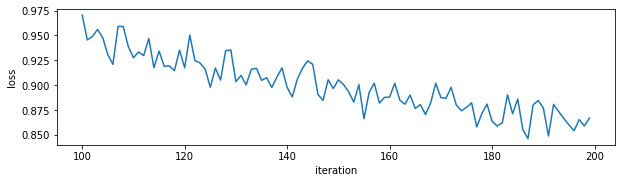

In [ ]:
plt.figure(figsize = (10,2.5) )
plt.plot(range(100,200),history.history['loss'][100:])
plt.xlabel('iteration')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

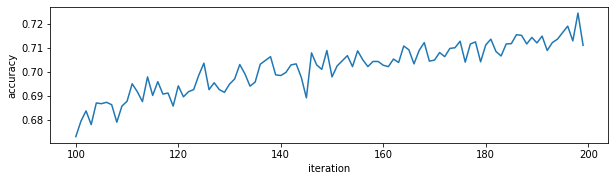

In [ ]:
plt.figure(figsize = (10,2.5) )
plt.plot(range(100,200),history.history['accuracy'][100:])
plt.xlabel('iteration')
plt.ylabel('accuracy')

Text(0, 0.5, 'val_loss')

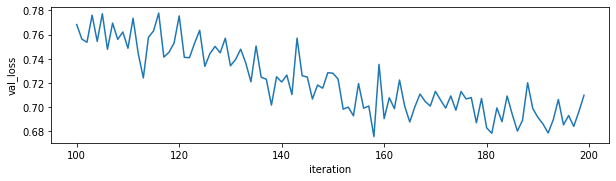

In [ ]:
plt.figure(figsize = (10,2.5) )
plt.plot(range(100,200),history.history['val_loss'][100:])
plt.xlabel('iteration')
plt.ylabel('val_loss')

Text(0, 0.5, 'val_acuuracy')

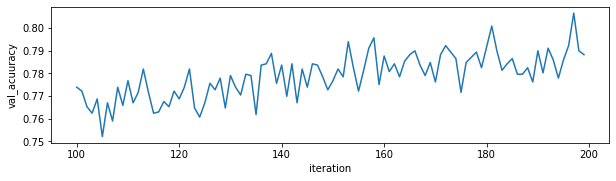

In [ ]:
plt.figure(figsize = (10,2.5) )
plt.plot(range(100,200),history.history['val_accuracy'][100:])
plt.xlabel('iteration')
plt.ylabel('val_acuuracy')

In [ ]:
test_accuracy = model.evaluate(X_test, y_test, verbose = 0)
print(test_accuracy[1])

0.7882083654403687


TESTING an audio

In [ ]:
test_file_location = '/content/drive/MyDrive/Datasets/test/fold1/102842-3-1-0.wav'
test_audio_feature = feature_extrator(test_file_location)
test_audio_feature = test_audio_feature.reshape(1,-1)

In [ ]:
predicted_label0 = model.predict(test_audio_feature)
predicted_label=np.argmax(predicted_label0,axis=1)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class 

array(['dog_bark'], dtype='<U16')

In [ ]:
ipd.Audio(test_file_location)

In [ ]:
data_file['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [ ]:
test_file_location2 = '/content/drive/MyDrive/Datasets/test/fold4/110621-7-0-2.wav'
test_audio_feature2 = feature_extrator(test_file_location2)
test_audio_feature2 = test_audio_feature2.reshape(1,-1)

In [ ]:
predicted_label_ary2 = model.predict(test_audio_feature2)
predicted_label2=np.argmax(predicted_label_ary2,axis=1)
prediction_class2 = labelencoder.inverse_transform(predicted_label2)
prediction_class2 

array(['jackhammer'], dtype='<U16')

In [ ]:
ipd.Audio(test_file_location2)

In [ ]:
test_file_location3 = '/content/drive/MyDrive/Datasets/test/fold2/104817-4-0-11.wav'
test_audio_feature3 = feature_extrator(test_file_location3)
test_audio_feature3 = test_audio_feature3.reshape(1,-1)

In [ ]:
predicted_label_ary3= model.predict(test_audio_feature3)
predicted_label3=np.argmax(predicted_label_ary3,axis=1)
prediction_class3 = labelencoder.inverse_transform(predicted_label3)
prediction_class3 

array(['drilling'], dtype='<U16')

In [ ]:
ipd.Audio(test_file_location3)